# Project 1 | 13th November 2020
So, where are we droppin' boys and girls?
Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island
empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all
while the play zone continues to shrink.
PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies
sold, it's the fifth best selling game of all time, and has millions of active monthly players.
The team at PUBG has made official game data available for the public to explore and scavenge outside
of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made
possible through the PUBG Developer API.
You are given over 65,000 games' worth of anonymized player data, split into training and testing sets,
and asked to predict final placement from final in-game stats and initial player ratings.
What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do
you need to be the top shot? Let's let the data do the talking!
Dataset’s columns Description:
groupId - Integer ID to identify a group within a match. If the same group of players plays in different
matches, they will have a different groupId each time.
matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.
assists - Number of enemy players this player damaged that were killed by teammates.
boosts - Number of boost items used.
damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
DBNOs - Number of enemy players knocked.
headshotKills - Number of enemy players killed with headshots.
heals - Number of healing items used.
killPlace - Ranking in match of number of enemy players killed.
killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
kills - Number of enemy players killed.
killStreaks - Max number of enemy players killed in a short amount of time.
longestKill - Longest distance between player and player killed at time of death. This may be misleading,
as downing a - player and driving away may lead to a large longestKill stat.
maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as
sometimes the data skips over placements.
numGroups - Number of groups we have data for in the match.
revives - Number of times this player revived teammates.
rideDistance - Total distance traveled in vehicles measured in meters.
roadKills - Number of kills while in a vehicle.
swimDistance - Total distance traveled by swimming measured in meters.
teamKills - Number of times this player killed a teammate.
vehicleDestroys - Number of vehicles destroyed.
walkDistance - Total distance traveled on foot measured in meters.
weaponsAcquired - Number of weapons picked up.
winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning
matters.)
winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to
1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups,
so it is possible to have missing chunks in a match.
Tasks to be performed:
1. Read the dataset.
2. Check the datatype of all the columns.
3. Find the summary of all the numerical columns and write your findings about it.
4. The average person kills how many players?
5. 99% of people have how many kills?
6. The most kills ever recorded are how much?
7. Print all the columns of the dataframe.
8. Comment on distribution of the match's duration. Use seaborn.
9. Comment on distribution of the walk distance. Use seaborn.
10. Plot distribution of the match's duration vs walk distance one below the other.
11. Plot distribution of the match's duration vs walk distance side by side.
12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.
13. How many unique values are there in 'matchType' and what are their counts?
14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.
15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.
16. Find the Categorical columns.
17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.
18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.
19. Change the orientation of the above plot to horizontal.
20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills,
teamKills, roadKills.
21. Round off column ‘winPlacePerc’ to 2 decimals.
22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot
it on a histogram and comment on its distribution.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
data = pd.read_csv('C:\\Users\\venka\\OneDrive\\Desktop\\DataScience-LU\\Project\\pubgDataSet.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0,0.0,0,0.0,0,0,332.7,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   groupId          10000 non-null  object 
 2   matchId          10000 non-null  object 
 3   assists          10000 non-null  int64  
 4   boosts           10000 non-null  int64  
 5   damageDealt      10000 non-null  float64
 6   DBNOs            10000 non-null  int64  
 7   headshotKills    10000 non-null  int64  
 8   heals            10000 non-null  int64  
 9   killPlace        10000 non-null  int64  
 10  killPoints       10000 non-null  int64  
 11  kills            10000 non-null  int64  
 12  killStreaks      10000 non-null  int64  
 13  longestKill      10000 non-null  float64
 14  matchDuration    10000 non-null  int64  
 15  matchType        10000 non-null  object 
 16  maxPlace         10000 non-null  int64  
 17  numGroups    

In [15]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


In [16]:
print("The average person kills",data['kills'].mean(),"players.")

The average person kills 0.9134 players.


In [17]:
print("99% of people have",np.percentile(data['kills'],99),"kills.")

99% of people have 7.0 kills.


In [18]:
print("The most kills ever recorded:",data['kills'].max())

The most kills ever recorded: 35


In [19]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Within 1250 to 1500, match duration is high.


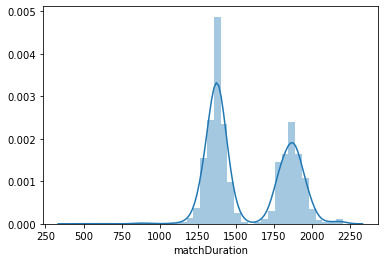

In [20]:
sns.distplot(data['matchDuration']);

print("Within 1250 to 1500, match duration is high.")

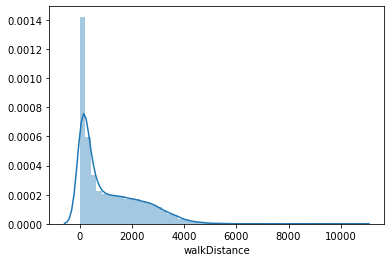

In [21]:
sns.distplot(data['walkDistance']);

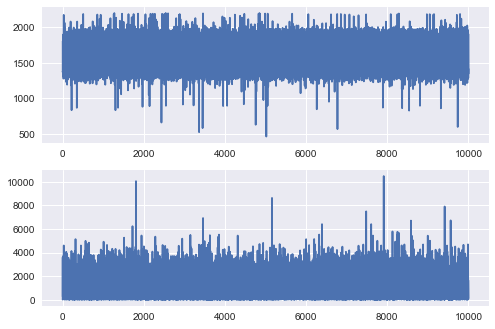

In [22]:
plt.style.use('seaborn')
plt.figure()
plt.subplot(2,1,1)
plt.plot(data['matchDuration'],'-')
plt.subplot(2,1,2)
plt.plot(data['walkDistance'],'-');

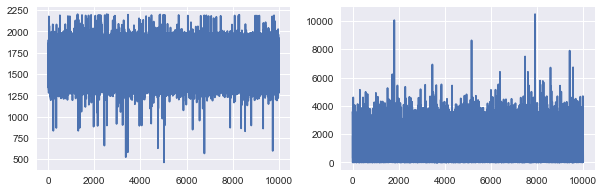

In [23]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(data['matchDuration'],'-')
plt.subplot(1,2,2)
plt.plot(data['walkDistance'],'-');

In [24]:
sns.pairplot(data);

Error in callback <function flush_figures at 0x000001B3070EC9D0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
data['matchType'].value_counts()

In [ ]:
sns.barplot(x='matchType',y='killPoints',data=data);
plt.xticks(rotation=70);

In [ ]:
sns.barplot(x='matchType',y='weaponsAcquired',data=data);
plt.xticks(rotation=70);

In [ ]:
data.select_dtypes(['category']).columns

In [ ]:
sns.boxplot(x='matchType',y='winPlacePerc',data=data);
plt.xticks(rotation=70);

In [ ]:
sns.boxplot(x='matchType',y='matchDuration',data=data);
plt.xticks(rotation=70);

In [ ]:
sns.boxplot(x='matchDuration',y='matchType',data=data);
plt.xticks(rotation=70);

In [ ]:
data['KILL'] = data['headshotKills'] + data['teamKills'] + data['roadKills']
data['KILL']

In [ ]:
data['winPlacePerc'] = round(data['winPlacePerc'], 2)
data['winPlacePerc']

In [2]:
data_arr = []
for i in range(100):
    data_arr.append(data['damageDealt'].sample(50).mean())

sns.distplot(data_arr);
plt.xlabel('damageDealt');

TypeError: list indices must be integers or slices, not str